<a href="https://colab.research.google.com/github/busrayildirim0/AI-Based-Cosmic-Rejection-Event-Classification-for-LArTPC-Detectors/blob/main/all_neutrino_and_cosmic_file_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import glob
import os
from sklearn.utils import shuffle

cosmic_folder_path = "/content/drive/MyDrive/signal-background-pilot-data/kozmikveriler"
neutrino_folder_path = "/content/drive/MyDrive/signal-background-pilot-data/neutrinoVeriler"

def find_header_row(file_path, target_keyword="EventID"):
    try:
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
            for i, line in enumerate(f):
                if target_keyword in line:
                    return i
        return 0
    except:
        return 0

def process_folder(folder_path, label, label_name):
    print(f"\n--- {label_name} Klasörü İşleniyor ---")

    all_files = glob.glob(os.path.join(folder_path, "*.csv"))

    if not all_files:
        print(f"UYARI: {folder_path} içinde hiç .csv dosyası bulunamadı")
        return None

    print(f"Bulunan dosya sayısı: {len(all_files)}")

    df_list = []

    for file in all_files:
        try:
            header_idx = find_header_row(file)

            df_temp = pd.read_csv(file, sep=',', header=header_idx, on_bad_lines='skip')

            df_temp.columns = df_temp.columns.str.strip()

            df_temp = df_temp[pd.to_numeric(df_temp['EventID'], errors='coerce').notnull()]

            initial_len = len(df_temp)
            df_temp['nHits'] = pd.to_numeric(df_temp['nHits'], errors='coerce')
            df_temp = df_temp[df_temp['nHits'] > 0]

            dropped = initial_len - len(df_temp)
            if dropped > 0: print(f"  -> {os.path.basename(file)}: {dropped} boş olay silindi.")

            df_temp = df_temp.dropna(axis=1, how='all')

            cols_to_convert = [col for col in df_temp.columns if col not in ['InteractionType', 'EventType']]
            for col in cols_to_convert:
                df_temp[col] = pd.to_numeric(df_temp[col], errors='coerce')

            df_temp['Target'] = int(label)

            df_list.append(df_temp)

        except Exception as e:
            print(f"HATA: {os.path.basename(file)} okunurken hata: {e}")

    if df_list:
        df_combined = pd.concat(df_list, ignore_index=True)
        print(f"{label_name} tamamlandı. Toplam Satır: {len(df_combined)}")
        return df_combined
    else:
        return None


df_cosmic = process_folder(cosmic_folder_path, label=0, label_name="Kozmik (Background)")

df_neutrino = process_folder(neutrino_folder_path, label=1, label_name="Nötrino (Signal)")

if df_cosmic is not None and df_neutrino is not None:

    df_final = pd.concat([df_cosmic, df_neutrino], ignore_index=True)

    df_final = shuffle(df_final, random_state=42).reset_index(drop=True)

    print(" BİRLEŞTİRİLMİŞ VE TEMİZLENMİŞ VERİ ")
    print(f"Toplam Olay Sayısı: {len(df_final)}")
    print(f"Kozmik Sayısı (0):  {len(df_final[df_final['Target']==0])}")
    print(f"Nötrino Sayısı (1): {len(df_final[df_final['Target']==1])}")

    n_sig = len(df_final[df_final['Target']==1])
    n_bkg = len(df_final[df_final['Target']==0])
    if n_sig > 0:
        print(f"Veri Dengesi: 1 Sinyal'e karşı {n_bkg/n_sig:.2f} Kozmik")

    print("\n--- Özelliklerin İstatistiksel Kontrolü (Min/Max/Mean) ---")
    numeric_cols = df_final.select_dtypes(include=[np.number]).columns
    stats = df_final[numeric_cols].describe().T[['min', 'mean', 'max']]

    pd.set_option('display.max_rows', None)
    pd.set_option('display.float_format', '{:.4f}'.format)
    print(stats)

    output_path = "/content/drive/MyDrive/signal-background-pilot-data/LArTPC_MultiFile_Cleaned.csv"
    df_final.to_csv(output_path, index=False)
    print(f"\nDosya başarıyla kaydedildi: {output_path}")

else:
    print("\n Veriler yüklenemediği için birleştirme yapılamadı.")


--- Kozmik (Background) Klasörü İşleniyor ---
Bulunan dosya sayısı: 10
  -> kozmik1.csv: 158884 boş olay silindi.
  -> kozmik2.csv: 27723 boş olay silindi.
  -> kozmik3.csv: 48361 boş olay silindi.
  -> kozmikfarklırandm1.csv: 23930 boş olay silindi.
  -> kozmikfarklırandom2.csv: 23831 boş olay silindi.
  -> kozmikfarklırandom3.csv: 71544 boş olay silindi.
  -> kozmikfarklırandom4.csv: 72157 boş olay silindi.
  -> kozmikfarklırandom5.csv: 72970 boş olay silindi.
  -> kozmikfarklırandom6.csv: 46670 boş olay silindi.
  -> kozmikfarklırandom7.csv: 59925 boş olay silindi.
Kozmik (Background) tamamlandı. Toplam Satır: 1921485

--- Nötrino (Signal) Klasörü İşleniyor ---
Bulunan dosya sayısı: 6
  -> neutrino1.csv: 14541 boş olay silindi.
  -> neutrino2.csv: 11445 boş olay silindi.
  -> neutrino3.csv: 37927 boş olay silindi.
  -> neutrino4.csv: 16929 boş olay silindi.
  -> neutrino5.csv: 27420 boş olay silindi.
  -> neutrino6.csv: 29116 boş olay silindi.
Nötrino (Signal) tamamlandı. Toplam Sa

Veri örneği yükleniyor...

Analiz edilecek özellik sayısı: 25


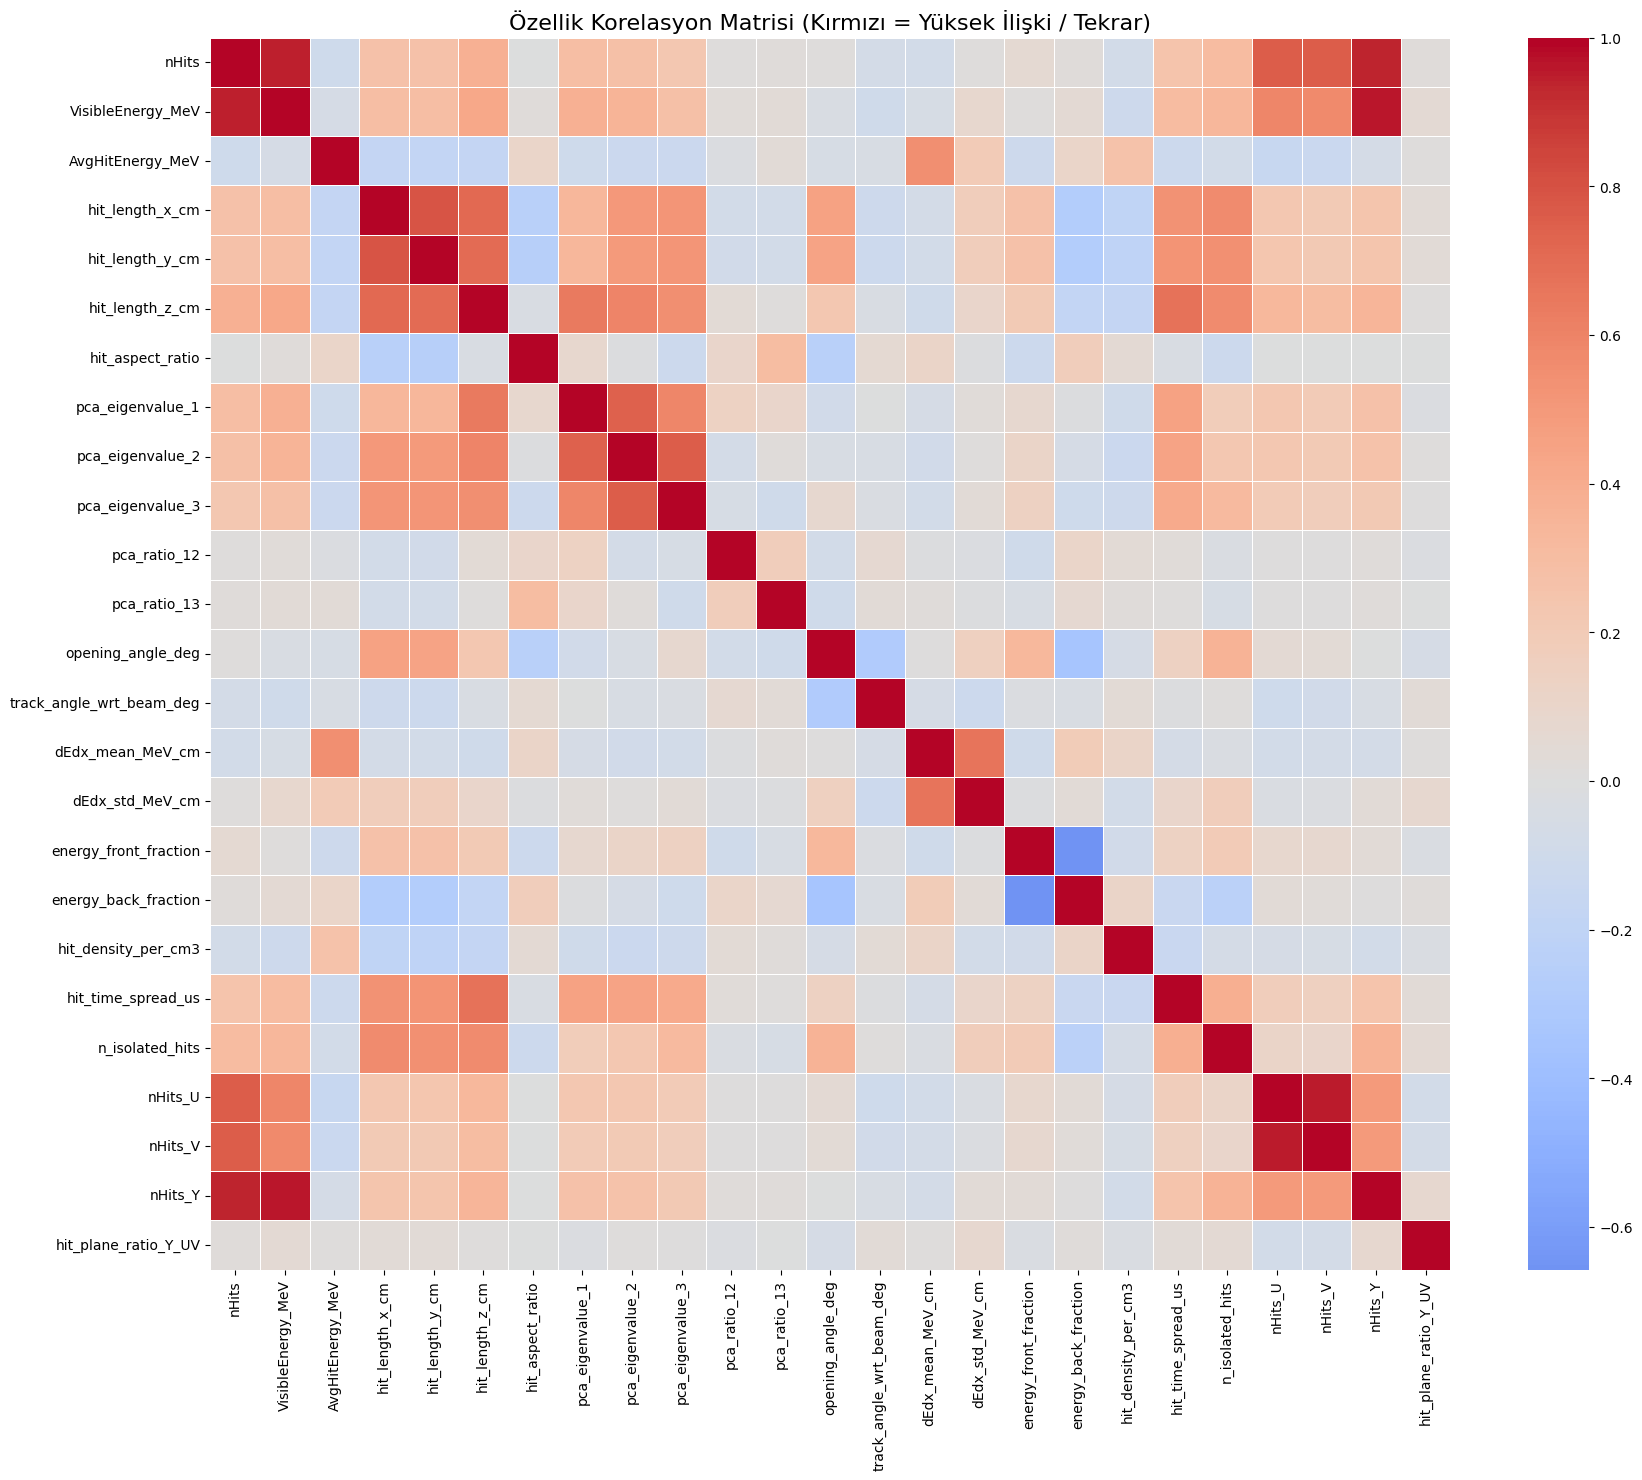


 Yüksek Korelasyonlu (Birbiriyle Aynı) Çiftler:
nHits_Y            VisibleEnergy_MeV   0.9590
VisibleEnergy_MeV  nHits_Y             0.9590
nHits_U            nHits_V             0.9543
nHits_V            nHits_U             0.9543
VisibleEnergy_MeV  nHits               0.9429
nHits              VisibleEnergy_MeV   0.9429
                   nHits_Y             0.9401
nHits_Y            nHits               0.9401
dtype: float64

Özellik Önemi Hesaplanıyor (Random Forest)...


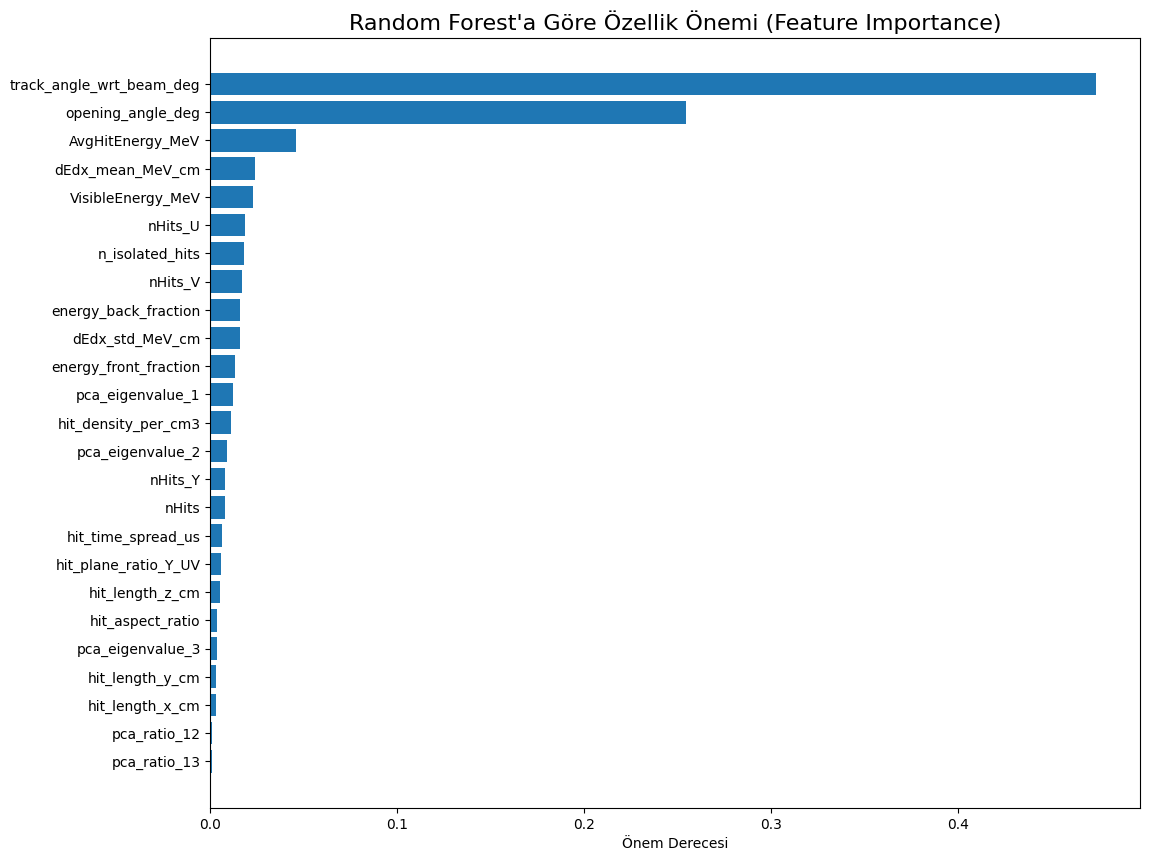


 En Az Etkili 5 Özellik (Atılabilir Adaylar):
1. pca_ratio_13: 0.00068
2. pca_ratio_12: 0.00105
3. hit_length_x_cm: 0.00301
4. hit_length_y_cm: 0.00326
5. pca_eigenvalue_3: 0.00352


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

file_path = "/content/drive/MyDrive/signal-background-pilot-data/LArTPC_MultiFile_Cleaned.csv"

#  analiz amaçlı rastgele 100.000 satır okuyoruz
print("Veri örneği yükleniyor...")
df_sample = pd.read_csv(file_path).sample(n=100000, random_state=42)

# Dedektörün bilemeyeceği "Truth" değişkenleri atıyoruz.
leakage_cols = [
    'EventID', 'EventType', 'InteractionType', # Metadata
    'Enu_GeV', 'Q2_GeV2', 'W_GeV',             # Nötrino Kinematiği (Bilinemez)
    'vertex_x_cm', 'vertex_y_cm', 'vertex_z_cm', # Gerçek Etkileşim Noktası (Bilinemez)
    'primary_px_GeV', 'primary_py_GeV', 'primary_pz_GeV', # Parçacık momentumu
    'primary_p_GeV', 'primary_E_GeV',          # Parçacık enerjisi
    'primary_theta_deg', 'primary_phi_deg',    # Parçacık açısı
    'primary_PDG'                              # Parçacık Kimliği
]

cols_to_drop = [col for col in leakage_cols if col in df_sample.columns]
df_analysis = df_sample.drop(columns=cols_to_drop)

print(f"\nAnaliz edilecek özellik sayısı: {len(df_analysis.columns) - 1}")

# --- 3. KORELASYON MATRİSİ (REDUNDANCY CHECK) ---
features = df_analysis.drop(columns=['Target'])
corr_matrix = features.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Özellik Korelasyon Matrisi (Kırmızı = Yüksek İlişki / Tekrar)", fontsize=16)
plt.show()

# Yüksek korelasyonlu çiftleri yazdır (>0.90)
print("\n Yüksek Korelasyonlu (Birbiriyle Aynı) Çiftler:")
corr_pairs = corr_matrix.unstack().sort_values(ascending=False)
high_corr = corr_pairs[(corr_pairs > 0.90) & (corr_pairs < 1.0)]
print(high_corr)

#  FEATURE IMPORTANCE (RANDOM FOREST)
print("\nÖzellik Önemi Hesaplanıyor (Random Forest)...")

X = features
y = df_analysis['Target']

rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf.fit(X, y)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 10))
plt.title("Random Forest'a Göre Özellik Önemi (Feature Importance)", fontsize=16)
plt.barh(range(X.shape[1]), importances[indices], align="center")
plt.yticks(range(X.shape[1]), [X.columns[i] for i in indices])
plt.xlabel("Önem Derecesi")
plt.gca().invert_yaxis()
plt.show()

print("\n En Az Etkili 5 Özellik (Atılabilir Adaylar):")
for i in range(1, 6):
    feat_name = X.columns[indices[-i]]
    feat_score = importances[indices[-i]]
    print(f"{i}. {feat_name}: {feat_score:.5f}")

In [ ]:
# --- OPTİMİZE EDİLMİŞ NİHAİ ÖZELLİK LİSTESİ ---
#  Random Forest analizine göre seçilmiştir.

final_features = [
    # 1. En Kritik Ayırt Ediciler (Top 3)
    'track_angle_wrt_beam_deg', # Kozmik dik gelir, Nötrino yatay.
    'opening_angle_deg',        # Topoloji: Kozmik düzdür (0), Nötrino saçılır.
    'AvgHitEnergy_MeV',         # Kalorimetri: Hit başına parlaklık (Yoğunluk).

    # 2. Parçacık Kimliği (PID)
    'dEdx_mean_MeV_cm',         # Proton/Müon ayrımı için enerji kaybı.
    'dEdx_std_MeV_cm',          # dE/dx dalgalanması.

    # 3. Enerji ve Yapı
    'VisibleEnergy_MeV',        # Toplam Enerji (nHits yerine bunu seçtik).
    'energy_front_fraction',    # Bragg Peak yönü (Başlangıç yoğunluğu).
    'energy_back_fraction',     # Bitiş yoğunluğu.

    # 4. Gürültü ve İndüksiyon
    'nHits_U',                  # Induction Plane: Importance listesinde yüksek çıktı.
    'n_isolated_hits'           # Gürültü Karakteri: Importance listesinde sürpriz şekilde üstte.
]

print(f"Final Model İçin Seçilen Özellik Sayısı: {len(final_features)}")

Final Model İçin Seçilen Özellik Sayısı: 10


In [ ]:
pip install tensorflow

Büyük Veri Seti Yükleniyor: /content/drive/MyDrive/signal-background-pilot-data/LArTPC_MultiFile_Cleaned.csv ...
Veri Yüklendi. Toplam Satır: 3275508

Eğitimde Kullanılacak Özellik Sayısı: 10
Özellik Listesi: ['track_angle_wrt_beam_deg', 'opening_angle_deg', 'AvgHitEnergy_MeV', 'dEdx_mean_MeV_cm', 'dEdx_std_MeV_cm', 'VisibleEnergy_MeV', 'energy_front_fraction', 'energy_back_fraction', 'nHits_U', 'n_isolated_hits']

Eğitim Seti Boyutu: 2620406
Test Seti Boyutu:   655102

Sınıf Ağırlıkları
Kozmik (0) Ağırlığı: 0.8523
Nötrino (1) Ağırlığı: 1.2095


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



 Model Eğitimi Başlıyor (Batch Size: 2048)
Epoch 1/50
1152/1152 ━━━━━━━━━━━━━━━━━━━━ 50s 40ms/step - accuracy: 0.9606 - loss: 0.1031 - val_accuracy: 0.9903 - val_loss: 0.0307 - learning_rate: 0.0010
Epoch 2/50
1152/1152 ━━━━━━━━━━━━━━━━━━━━ 47s 41ms/step - accuracy: 0.9884 - loss: 0.0382 - val_accuracy: 0.9910 - val_loss: 0.0284 - learning_rate: 0.0010
Epoch 3/50
1152/1152 ━━━━━━━━━━━━━━━━━━━━ 59s 51ms/step - accuracy: 0.9897 - loss: 0.0342 - val_accuracy: 0.9919 - val_loss: 0.0257 - learning_rate: 0.0010
Epoch 4/50
1152/1152 ━━━━━━━━━━━━━━━━━━━━ 45s 39ms/step - accuracy: 0.9904 - loss: 0.0318 - val_accuracy: 0.9922 - val_loss: 0.0244 - learning_rate: 0.0010
Epoch 5/50
1152/1152 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - accuracy: 0.9907 - loss: 0.0307 - val_accuracy: 0.9920 - val_loss: 0.0243 - learning_rate: 0.0010
Epoch 6/50
1152/1152 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - accuracy: 0.9911 - loss: 0.0294 - val_accuracy: 0.9921 - val_loss: 0.0246 - learning_rate: 0.0010
Epoch 7/50
1152/1152

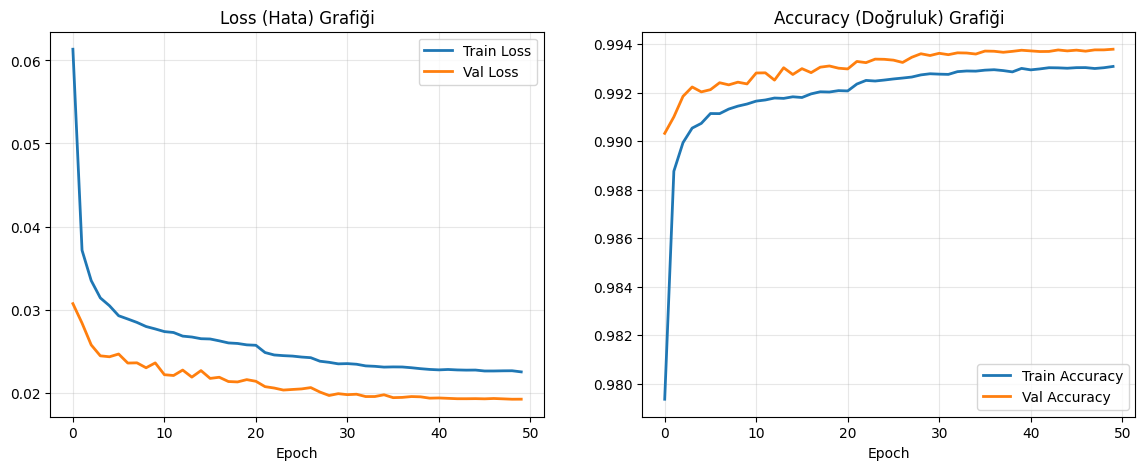


 Test Seti Üzerinde Tahmin Alınıyor 
320/320 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step

 Otomatik Hesaplanan En İyi Eşik Değeri: 0.5343
FiNAL SINIFLANDIRMA RAPORU
              precision    recall  f1-score   support

  Kozmik (0)       0.99      1.00      0.99    384297
 Nötrino (1)       1.00      0.99      0.99    270805

    accuracy                           0.99    655102
   macro avg       0.99      0.99      0.99    655102
weighted avg       0.99      0.99      0.99    655102



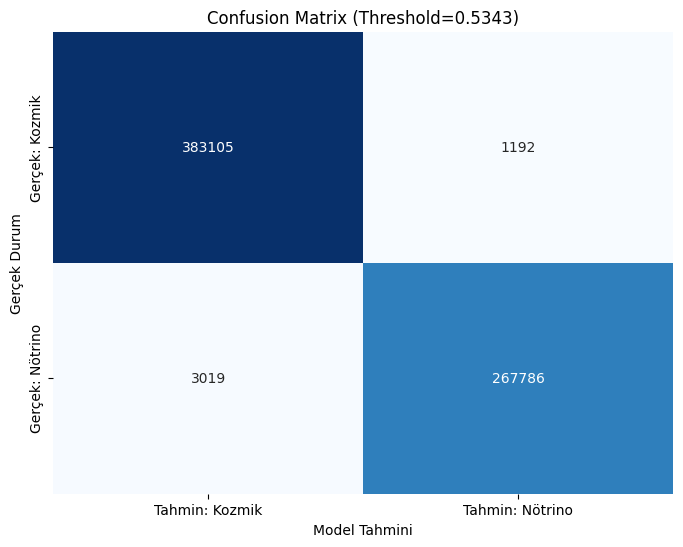

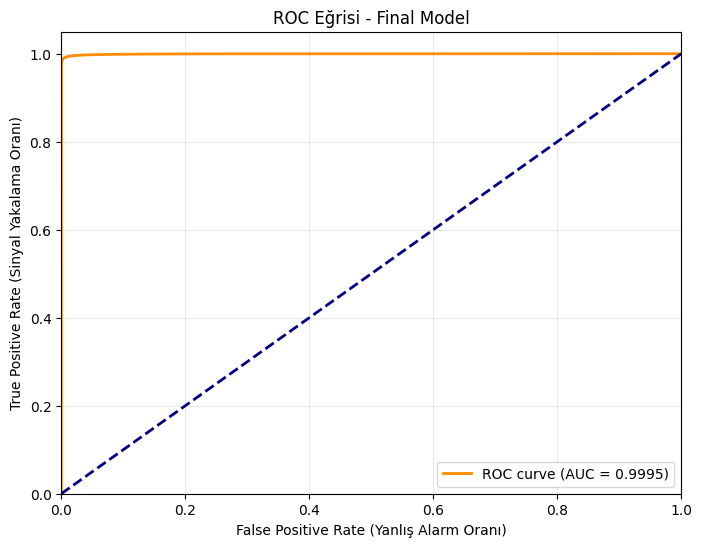


 Model kaydedildi: LArTPC_Final_Model_3M.keras


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.utils import class_weight

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

file_path = "/content/drive/MyDrive/signal-background-pilot-data/LArTPC_MultiFile_Cleaned.csv"
print(f"Büyük Veri Seti Yükleniyor: {file_path} ...")
df = pd.read_csv(file_path)

print(f"Veri Yüklendi. Toplam Satır: {len(df)}")

final_features = [
    'track_angle_wrt_beam_deg',
    'opening_angle_deg',        # Topoloji
    'AvgHitEnergy_MeV',         # Kalorimetri

    # PID (Parçacık Kimliği)
    'dEdx_mean_MeV_cm',
    'dEdx_std_MeV_cm',

    # Enerji ve Yapı
    'VisibleEnergy_MeV',
    'energy_front_fraction',
    'energy_back_fraction',

    # Gürültü ve İndüksiyon
    'nHits_U',
    'n_isolated_hits'
]

X = df[final_features]
y = df['Target']

print(f"\nEğitimde Kullanılacak Özellik Sayısı: {X.shape[1]}")
print("Özellik Listesi:", list(X.columns))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nEğitim Seti Boyutu: {len(X_train)}")
print(f"Test Seti Boyutu:   {len(X_test)}")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = {0: weights[0], 1: weights[1]}

print("\nSınıf Ağırlıkları")
print(f"Kozmik (0) Ağırlığı: {class_weights[0]:.4f}")
print(f"Nötrino (1) Ağırlığı: {class_weights[1]:.4f}")

model = Sequential()

model.add(Dense(256, input_shape=(X_train_scaled.shape[1],), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)

print("\n Model Eğitimi Başlıyor (Batch Size: 2048)")
history = model.fit(
    X_train_scaled, y_train,
    epochs=50,
    batch_size=2048,
    validation_split=0.1,
    class_weight=class_weights,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Val Loss', linewidth=2)
plt.title('Loss (Hata) Grafiği')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Val Accuracy', linewidth=2)
plt.title('Accuracy (Doğruluk) Grafiği')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()

print("\n Test Seti Üzerinde Tahmin Alınıyor ")
y_pred_prob = model.predict(X_test_scaled, batch_size=2048)

precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_prob)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
best_idx = np.argmax(f1_scores)
BEST_THRESHOLD = thresholds[best_idx]

print(f"\n Otomatik Hesaplanan En İyi Eşik Değeri: {BEST_THRESHOLD:.4f}")

y_pred = (y_pred_prob > BEST_THRESHOLD).astype(int).flatten()

print("FiNAL SINIFLANDIRMA RAPORU")
print(classification_report(y_test, y_pred, target_names=['Kozmik (0)', 'Nötrino (1)']))

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Tahmin: Kozmik', 'Tahmin: Nötrino'],
            yticklabels=['Gerçek: Kozmik', 'Gerçek: Nötrino'])
plt.title(f'Confusion Matrix (Threshold={BEST_THRESHOLD:.4f})')
plt.ylabel('Gerçek Durum')
plt.xlabel('Model Tahmini')
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (Yanlış Alarm Oranı)')
plt.ylabel('True Positive Rate (Sinyal Yakalama Oranı)')
plt.title('ROC Eğrisi - Final Model')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

model.save("/content/drive/MyDrive/signal-background-pilot-data/LArTPC_Final_Model_3M.keras")
print("\n Model kaydedildi: LArTPC_Final_Model_3M.keras")